0.835016835017
81.93


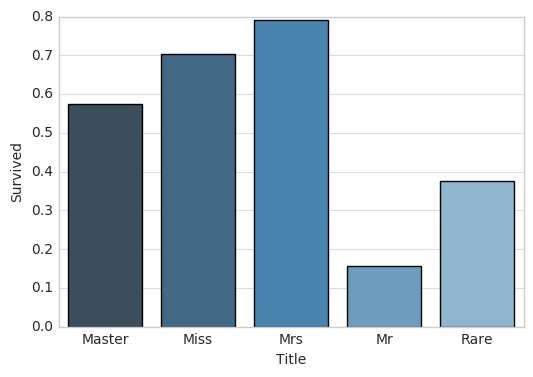

In [218]:
import pandas as pd
import re
import matplotlib.pyplot as plt

#Visiulization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import sklearn

test=pd.read_csv(r'data\test.csv')

train=pd.read_csv(r'data\train.csv')

# remove unwanted features, in both train and test set

passengerid=test['PassengerId']
train.drop(['Ticket','PassengerId','Cabin'],axis=1,inplace=True)
test.drop(['Ticket','PassengerId','Cabin'],axis=1,inplace=True)


#Extracting Title from name

def getTitle(name):
    return re.search(r' ([A-Za-z]+)\.',name).group(1)

def mapTitle(title):
    if title =='Master':
        return 0
    elif title in ['Miss','Mlle','Mme']:
        return 1
    elif title =='Mrs':
        return 2
    elif title=='Mr':
        return 3
    else:
        return 4

train['Title']=train['Name'].apply(getTitle).apply(mapTitle)
test['Title']=test['Name'].apply(getTitle).apply(mapTitle)

#Name can be dropped now
train.drop(['Name'],axis=1,inplace=True)
test.drop(['Name'],axis=1,inplace=True)
# Plot Title vs Survival rate just to get a feel, that title does correspond to survival
tc=train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()
sns.set_style("whitegrid")
ax = sns.barplot(x=tc['Title'], y=tc['Survived'], data=tc,palette="Blues_d")
ax.set_xticklabels(['Master','Miss','Mrs','Mr','Rare'])



# Numerize the embarked feature, also take care of null values

# Most comman port embarked is 'S'
train.groupby(['Embarked']).count()


# SO fill the missing embarked with 'S'
train.loc[train['Embarked'].isnull(),'Embarked']='S'
test.loc[test['Embarked'].isnull(),'Embarked']='S'



# #numerize the embarked column
train['Embarked']=train['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)
test['Embarked']=test['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)

# Sex
train[train['Sex']=='S']='Female'
train['Sex']=train['Sex'].map( {'female': 1, 'male': 0,'Female':1} ).astype(int)
test['Sex']=test['Sex'].map( {'female': 1, 'male': 0,'Female':1} ).astype(int)

#Fare cloumn is split in buckets 0,1,2 and 3

train.loc[train['Fare']<8,'Fare']=0
train.loc[(train['Fare']>8)&(train['Fare']<=14),'Fare']=1
train.loc[(train['Fare']>14)&(train['Fare']<=35),'Fare']=2
train.loc[train['Fare']>35,'Fare']=3
train['Fare']=train['Fare'].astype(int)

test['Fare']=test['Fare'].fillna(test['Fare'].mean())
#Same for test set
test.loc[test['Fare']<8,'Fare']=0
test.loc[(test['Fare']>8)&(test['Fare']<=14),'Fare']=1
test.loc[(test['Fare']>14)&(test['Fare']<=35),'Fare']=2
test.loc[test['Fare']>35,'Fare']=3

test['Fare']=test['Fare'].astype(int)

#Age coulmn
train['Age']=train['Age'].fillna(train['Age'].mean())
test['Age']=test['Age'].fillna(test['Age'].mean())

train['Age'] = train['Age'].astype(int)
test['Age']    = test['Age'].astype(int)

train.loc[ train['Age'] <= 16, 'Age'] = 0
train.loc[(train['Age'] > 16) & (train['Age'] <= 32), 'Age'] = 1
train.loc[(train['Age'] > 32) & (train['Age'] <= 48), 'Age'] = 2
train.loc[(train['Age'] > 48) & (train['Age'] <= 64), 'Age'] = 3
train.loc[(train['Age'] > 64), 'Age'] = 4

test.loc[ test['Age'] <= 16, 'Age'] = 0
test.loc[(test['Age'] > 16) & (test['Age'] <= 32), 'Age'] = 1
test.loc[(test['Age'] > 32) & (test['Age'] <= 48), 'Age'] = 2
test.loc[(test['Age'] > 48) & (test['Age'] <= 64), 'Age'] = 3
test.loc[(test['Age'] > 64), 'Age'] = 4

test.head()
#train.head()

# # convert from float to int
# train['Fare']=train['Fare'].astype(int)

# train.head()

# predict
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test

svc = SVC()

svc.fit(X_train, Y_train.ravel())

Y_pred_4 = svc.predict(X_test)

print(svc.score(X_train, Y_train))


random_forest = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=3, max_features='sqrt', min_samples_split=2)

random_forest.fit(X_train, Y_train)

Y_pred_1 = random_forest.predict(X_test)

print( round(random_forest.score(X_train, Y_train) * 100, 2))

submission = pd.DataFrame({
        "PassengerId": passengerid,
        "Survived": Y_pred_1
    })
submission.to_csv('output/submission.csv', index=False)